In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
#!pip install tensorflow[and-cuda]
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import plotly.graph_objects as go
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1

In [ ]:
#configuring helpful things
#np.set_printoptions(suppress=True, precision=2)

#reading dataset
file_name = "datasets/ObesityDataSet_raw_and_data_sinthetic.csv"
df_obj = pd.read_csv(file_name);
print(df_obj)

      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

In [ ]:
#Data cleaning
##Calculating missing value foreach column
missing_percentage = df_obj.isnull().sum()/len(df_obj) * 100
print(missing_percentage)

Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
CAEC                              0.0
SMOKE                             0.0
CH2O                              0.0
SCC                               0.0
FAF                               0.0
TUE                               0.0
CALC                              0.0
MTRANS                            0.0
NObeyesdad                        0.0
dtype: float64


In [ ]:
#Data cleanining
#Removing missing value samples
df_obj = df_obj.dropna(axis='index')

#Calculating missing percentage again
missing_percentage = df_obj.isnull().sum()/len(df_obj) * 100
print(missing_percentage)

Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
CAEC                              0.0
SMOKE                             0.0
CH2O                              0.0
SCC                               0.0
FAF                               0.0
TUE                               0.0
CALC                              0.0
MTRANS                            0.0
NObeyesdad                        0.0
dtype: float64


In [ ]:
#Data cleanining
#Checking duplicate
print("Number of duplicate row:",
      df_obj.duplicated().sum())

Number of duplicate row: 24


In [ ]:
#Data cleanining
#Removing duplicate row
df_obj = df_obj.drop_duplicates()

#Checking duplicate again
print("Number of duplicate row after removed duplicate:",
      df_obj.duplicated().sum())

Number of duplicate row after removed duplicate: 0


In [ ]:
#Data preprocessing
#Label Encoding
for colName in df_obj.columns:
    if(df_obj[colName].dtype == 'object'):
        df_obj[colName] = df_obj[colName].astype('category');
        df_obj[colName] = df_obj[colName].cat.codes;

print(df_obj)

      Gender        Age    Height      Weight  family_history_with_overweight  \
0          0  21.000000  1.620000   64.000000                               1   
1          0  21.000000  1.520000   56.000000                               1   
2          1  23.000000  1.800000   77.000000                               1   
3          1  27.000000  1.800000   87.000000                               0   
4          1  22.000000  1.780000   89.800000                               0   
...      ...        ...       ...         ...                             ...   
2106       0  20.976842  1.710730  131.408528                               1   
2107       0  21.982942  1.748584  133.742943                               1   
2108       0  22.524036  1.752206  133.689352                               1   
2109       0  24.361936  1.739450  133.346641                               1   
2110       0  23.664709  1.738836  133.472641                               1   

      FAVC  FCVC  NCP  CAEC

In [ ]:
data = np.array(df_obj)
#print(data)
y = data[:, 16]
X = data[:, :16]
print(y)
print(X[:,0])

[1. 1. 1. ... 4. 4. 4.]
[0. 0. 1. ... 0. 0. 0.]


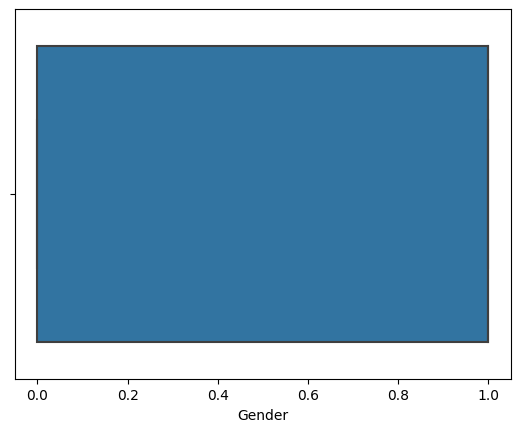

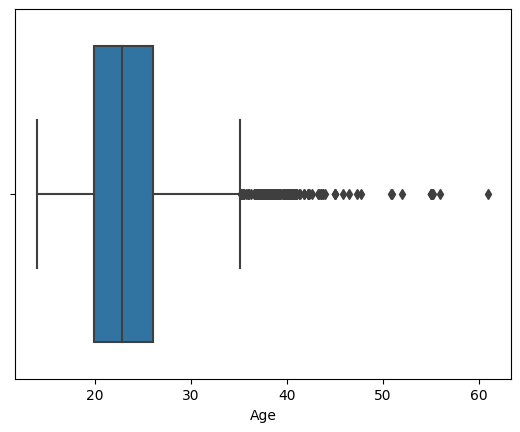

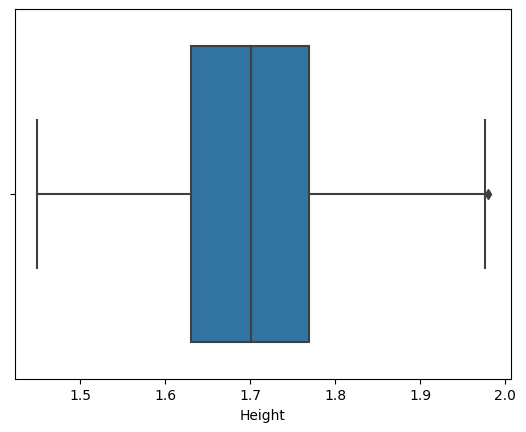

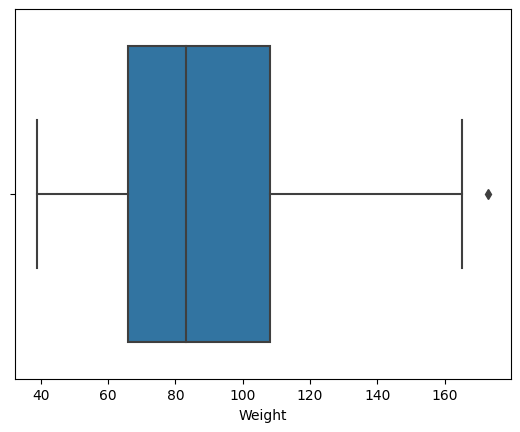

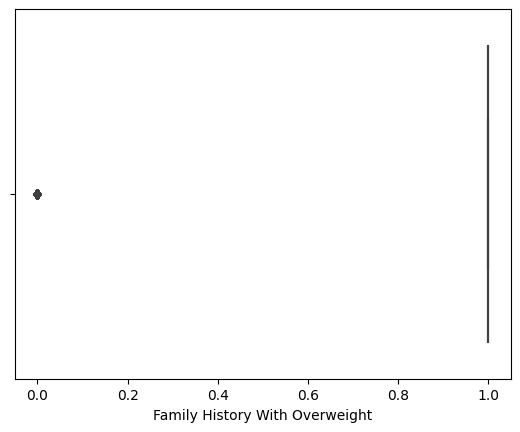

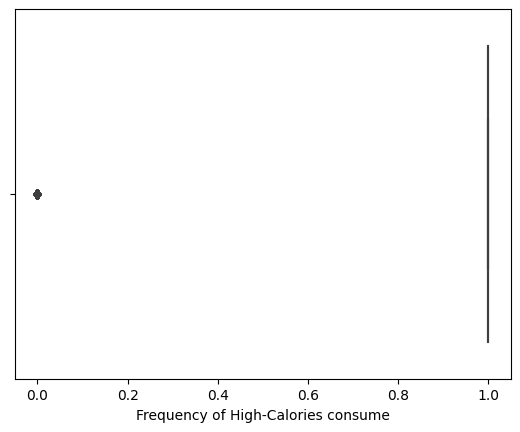

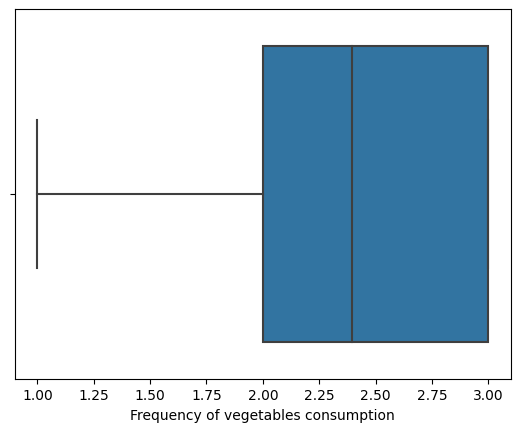

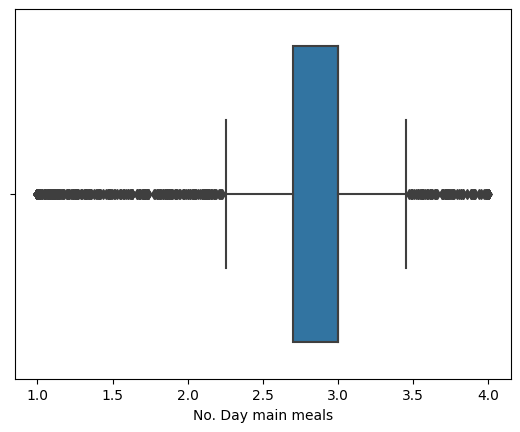

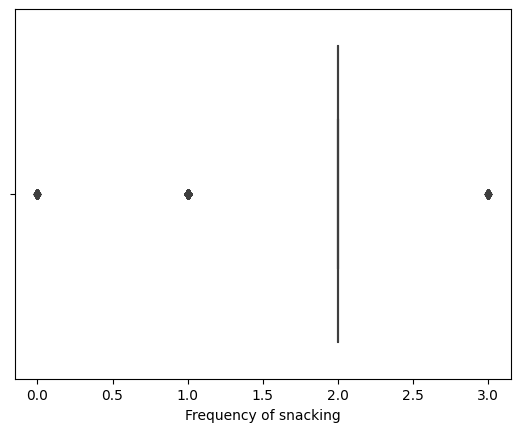

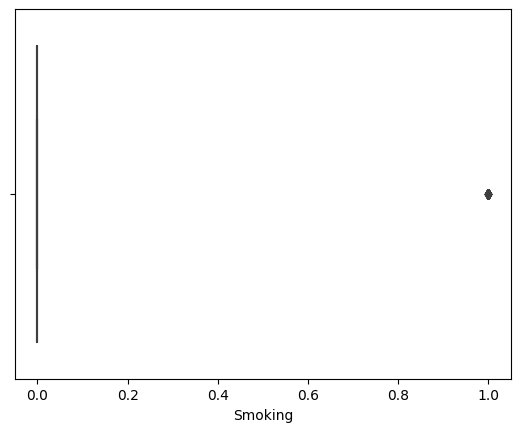

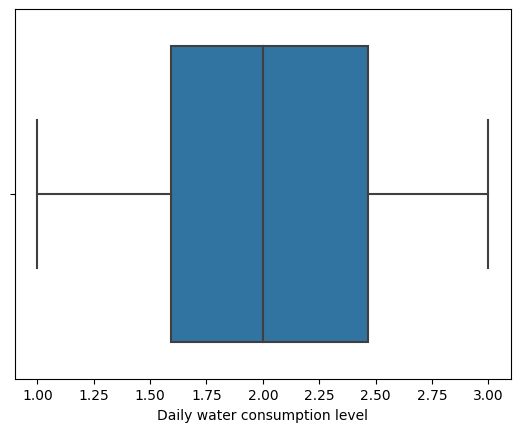

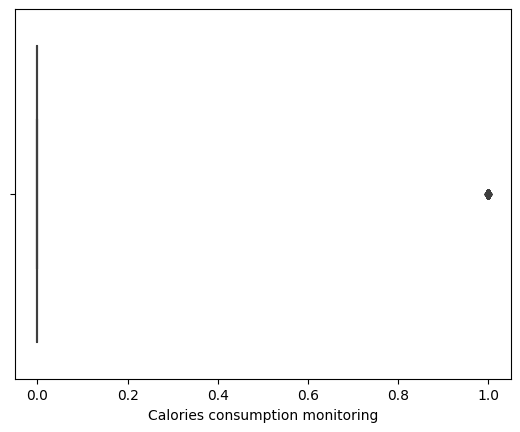

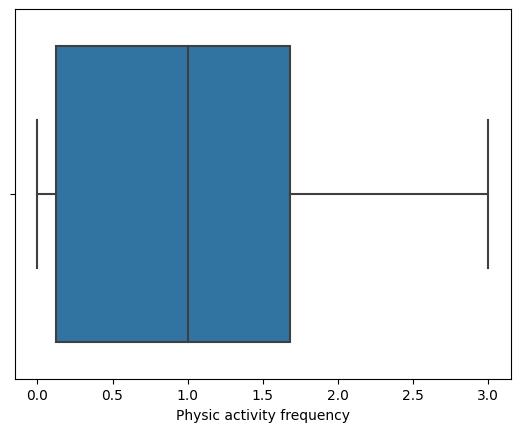

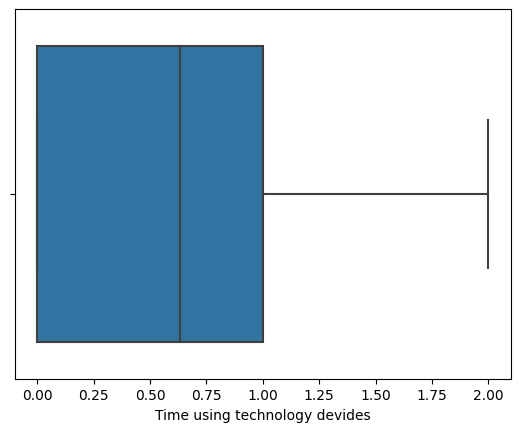

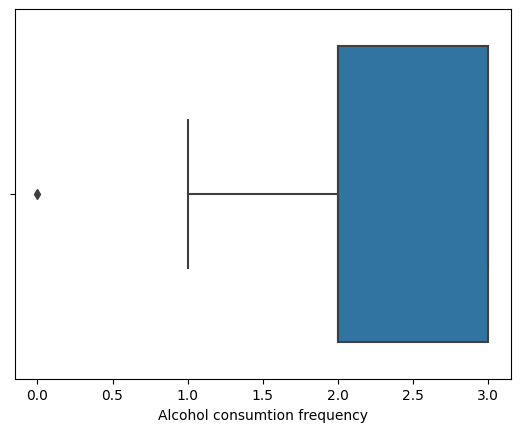

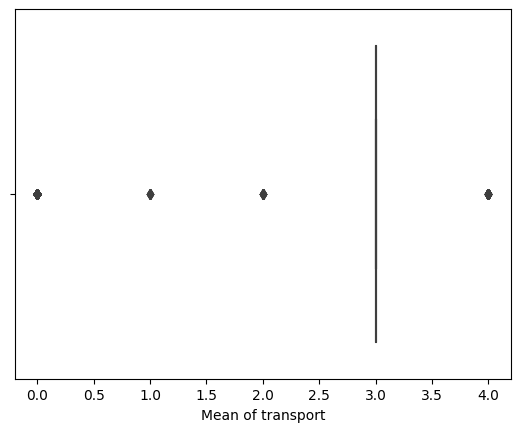

In [ ]:
#Data cleanining
col_display_names = ["Gender","Age","Height","Weight","Family History With Overweight",
                    "Frequency of High-Calories consume","Frequency of vegetables consumption",
                    "No. Day main meals","Frequency of snacking", "Smoking", "Daily water consumption level",
                    "Calories consumption monitoring", "Physic activity frequency", "Time using technology devides",
                    "Alcohol consumtion frequency", "Mean of transport", "Obesity Level"]
#Consider the distribution and representation of correlation values
for colIdx in range(16):
    sns.boxplot(x=X[:, colIdx])
    plt.title('')
    plt.xlabel(f'{col_display_names[colIdx]}')
    plt.show()

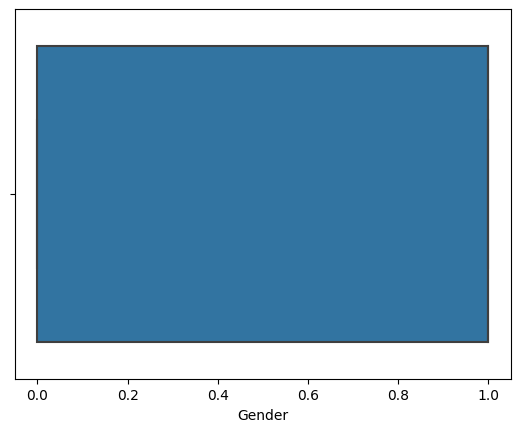

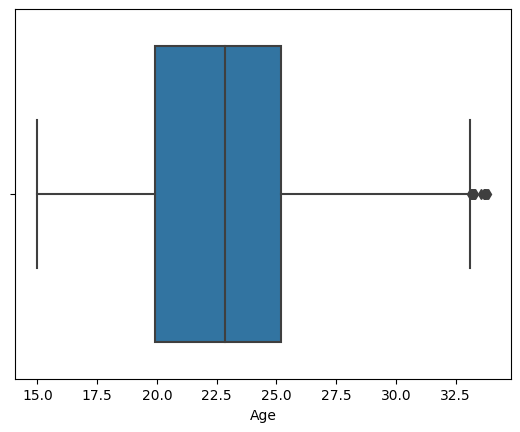

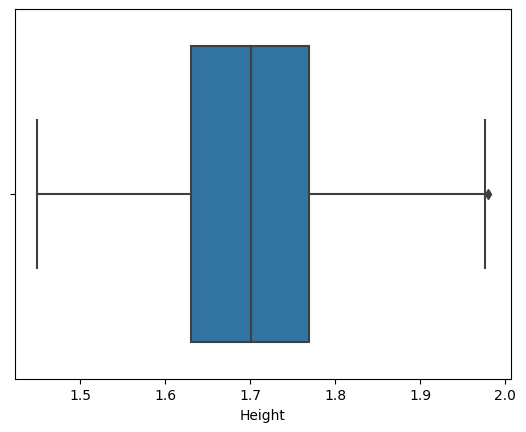

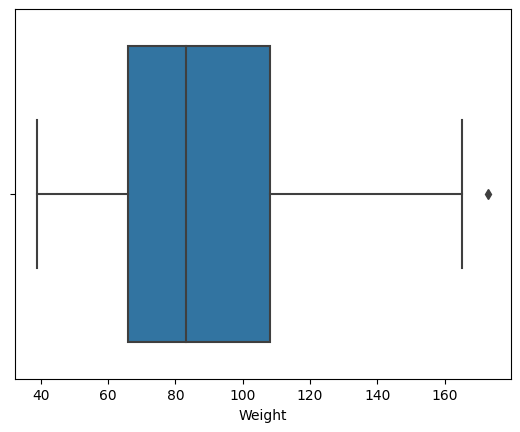

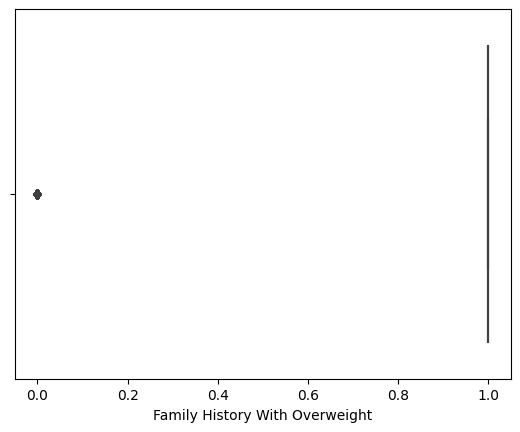

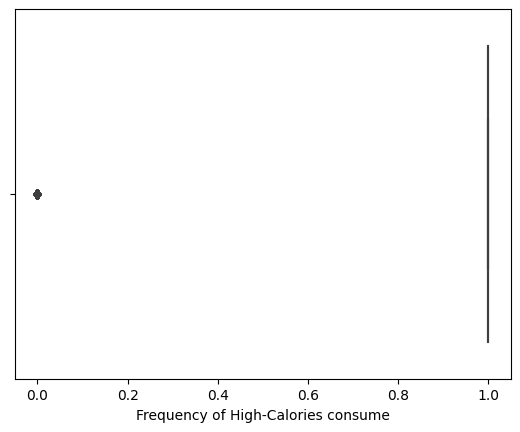

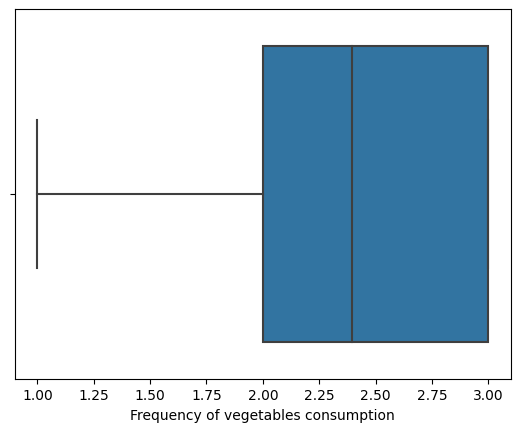

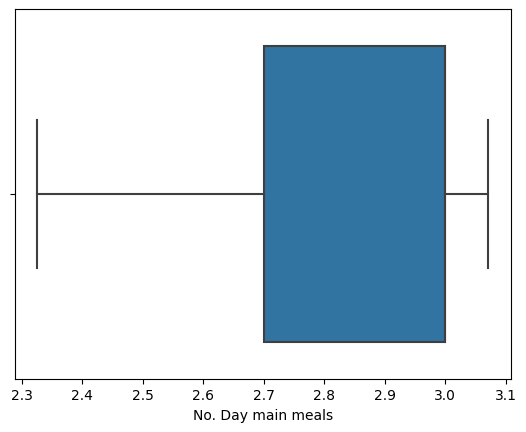

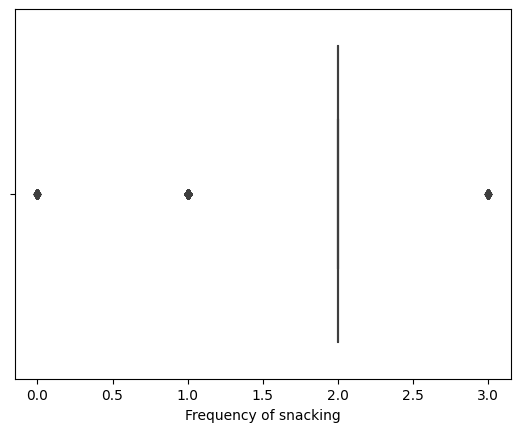

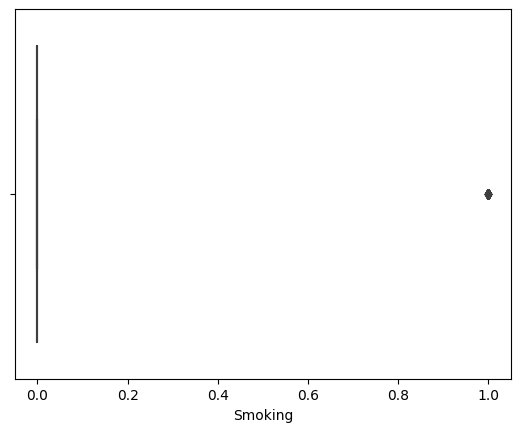

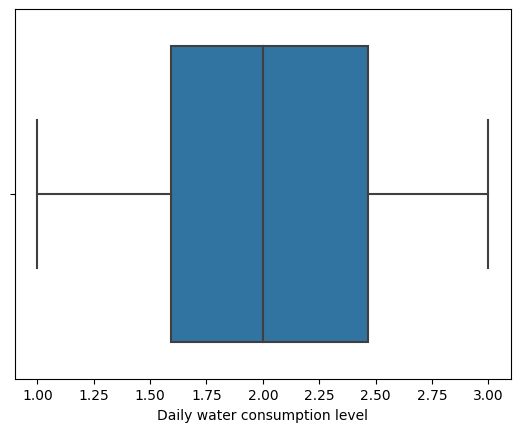

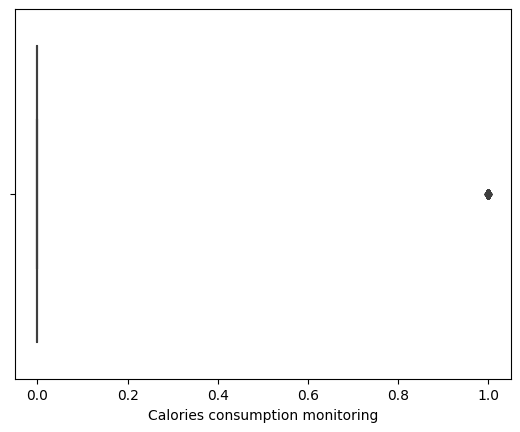

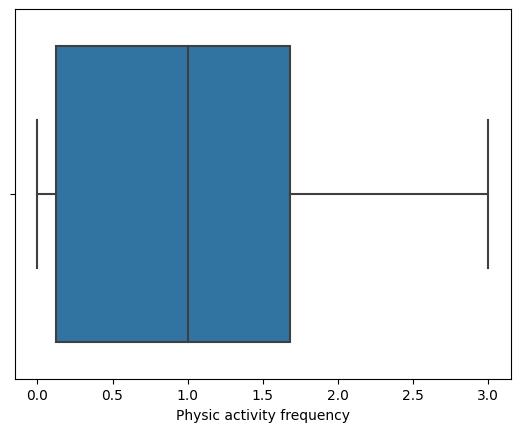

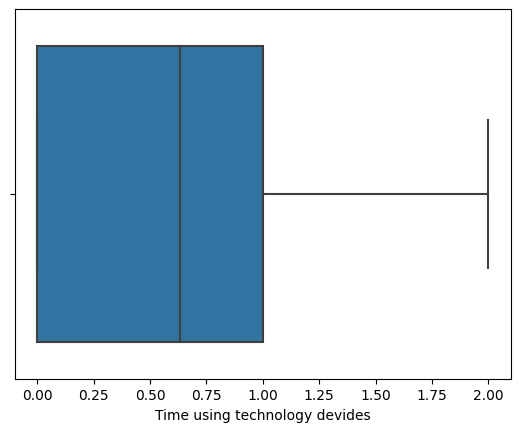

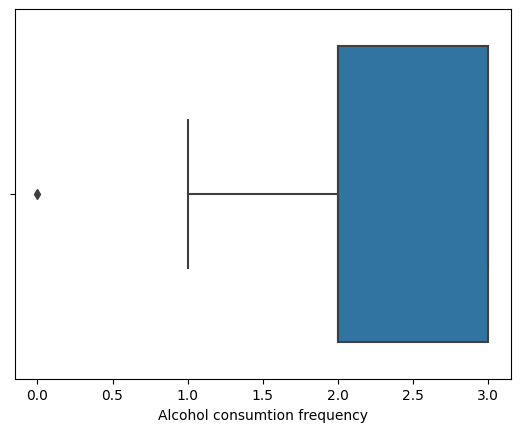

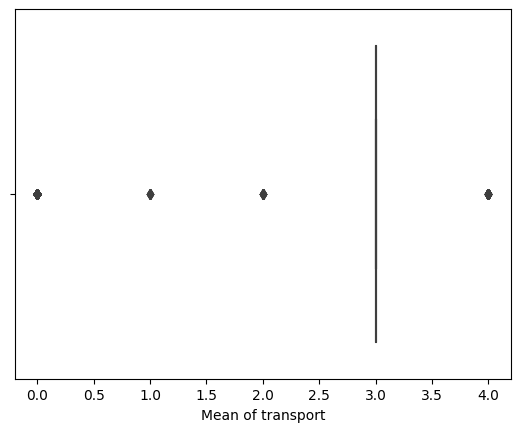

In [ ]:
#Data cleanining: Handle outliers
def replace_outliers_with_mean(data, threshold=0.5):
    data_mean = np.mean(data)
    data_std = np.std(data)

    lower_bound = data_mean - threshold * data_std
    upper_bound = data_mean + threshold * data_std

    data_with_mean = np.where((data < lower_bound) | (data > upper_bound), data_mean, data)

    return data_with_mean

#Handle outliers (I replaced outliers value by mean value)
X[:, 1] = replace_outliers_with_mean(X[:, 1], threshold=1.5) #Age and Daily main meals has many ouliners
X[:, 7] = replace_outliers_with_mean(X[:, 7])

#Let check the outliers again
for colIdx in range(16):
    sns.boxplot(x=X[:, colIdx])
    plt.title('')
    plt.xlabel(f'{col_display_names[colIdx]}')
    plt.show()

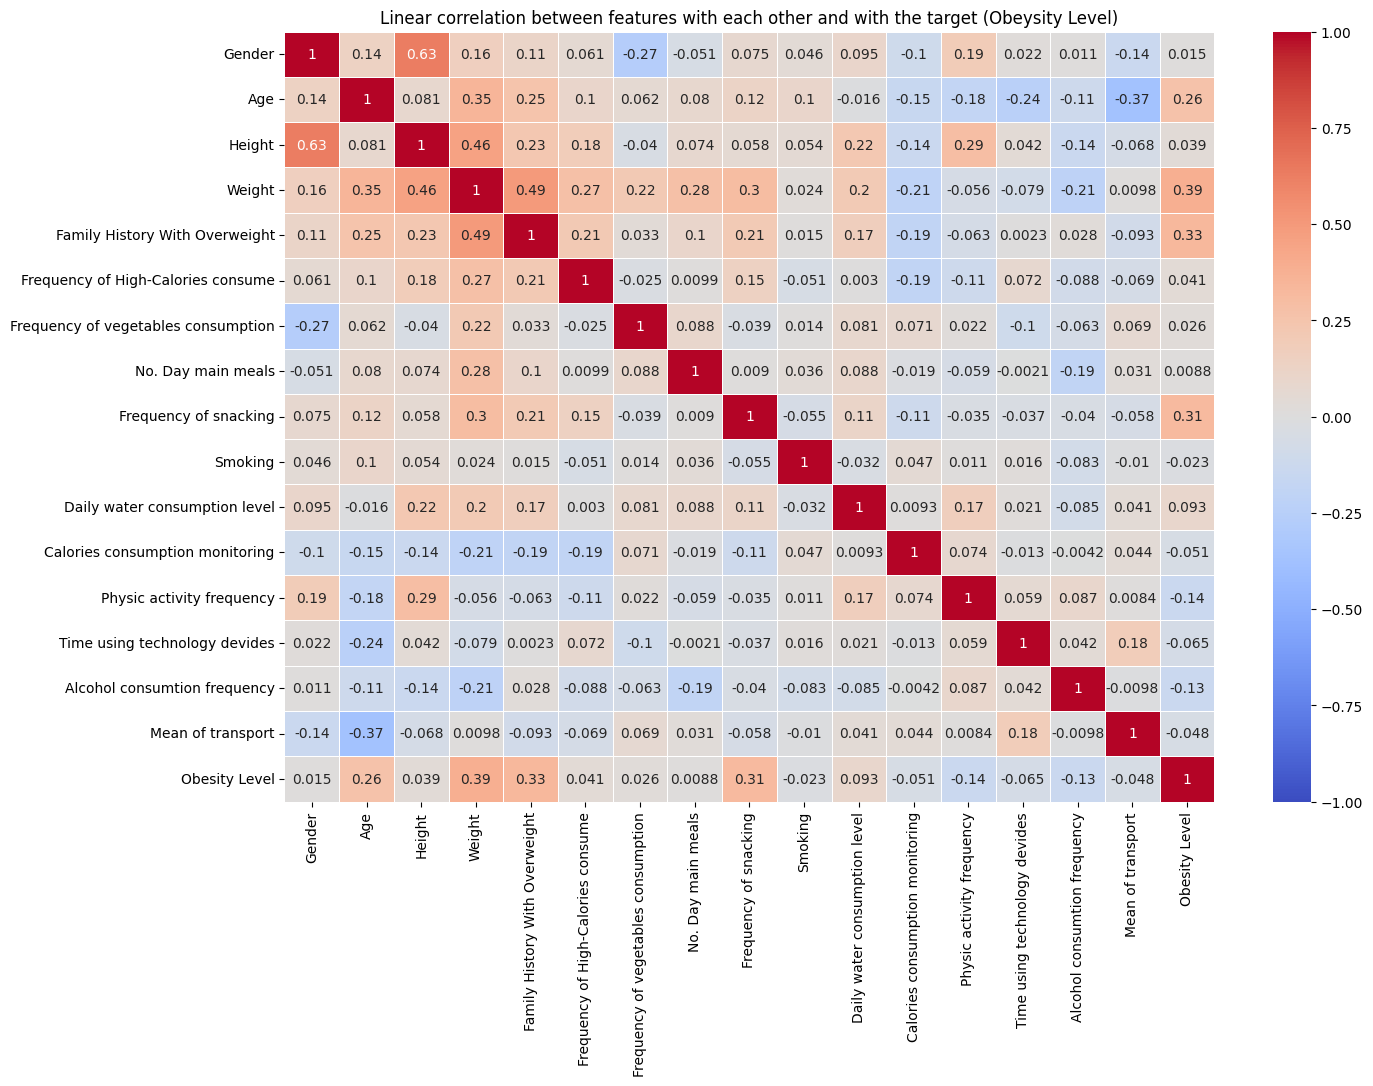

In [ ]:
# Pearson: corr(X, Y) = cov(X, Y) / (std(X) * std(Y))
# Spearman: corr(X, Y) = cov(rank(X), rank(Y)) / (std(rank(X)) * std(rank(Y)))
#The correlation coefficient is in the range [-1, 1].
#1: Positive or perfectly linear relationship.
#0: There is no linear relationship.
#-1: Inverse linear or completely inverse linear relationship.
correlation_matrix = np.corrcoef(data, rowvar=False)
#
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5, xticklabels = col_display_names, yticklabels = col_display_names)
plt.title('Linear correlation between features with each other and with the target (Obeysity Level)')
plt.show()

In [ ]:
#Correclation between Height, Weight and Obesity Level
fig = px.scatter(df_obj,x = "Weight", y="Height", symbol="NObeyesdad", size='Height', hover_data=['Height'])
fig.show()

In [ ]:
# # #Calculate the
# from sklearn.feature_selection import chi2

# chi2, p_values = chi2(X, y)

# print("Chi-squared:\n", chi2)
# print("p values:\n", p_values)

# alpha = 0.05
# X = X[:, p_values<alpha]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .75)

In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=5, criterion='entropy', max_depth=10)
rf_clf.fit(X_train, y_train)

rf_pred = rf_clf.predict(X_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86       189
         1.0       0.63      0.58      0.60       213
         2.0       0.80      0.92      0.86       265
         3.0       0.96      0.93      0.95       226
         4.0       1.00      1.00      1.00       240
         5.0       0.75      0.62      0.68       215
         6.0       0.70      0.67      0.68       218

    accuracy                           0.81      1566
   macro avg       0.81      0.81      0.80      1566
weighted avg       0.81      0.81      0.81      1566



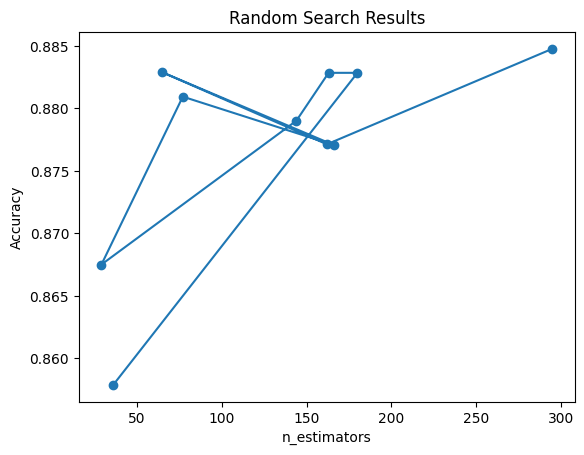

Best n_estimators: 295
Corresponding Accuracy: 0.8847619047619049


In [ ]:
#Finding best n_estimators for increasing accuracy
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_dist = {'n_estimators': randint(10, 300)}

rf_classifier = RandomForestClassifier()

random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

results = random_search.cv_results_
n_estimators_values = results['param_n_estimators'].data
accuracies = results['mean_test_score']

plt.plot(n_estimators_values, accuracies, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Random Search Results')
plt.show()

best_n_estimators = random_search.best_params_['n_estimators']
best_accuracy = random_search.best_score_

print(f"Best n_estimators: {best_n_estimators}")
print(f"Corresponding Accuracy: {best_accuracy}")

In [ ]:
#RandomForest with best n_estimators
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=91, criterion='entropy', max_depth=10)
rf_clf.fit(X_train, y_train)

rf_pred = rf_clf.predict(X_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88       189
         1.0       0.79      0.75      0.77       213
         2.0       0.93      0.95      0.94       265
         3.0       0.99      0.99      0.99       226
         4.0       1.00      1.00      1.00       240
         5.0       0.87      0.81      0.84       215
         6.0       0.84      0.86      0.85       218

    accuracy                           0.90      1566
   macro avg       0.90      0.90      0.90      1566
weighted avg       0.90      0.90      0.90      1566



In [ ]:
#AdaBoost
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
base_model = DecisionTreeClassifier(max_depth=10)
ada_classifier = AdaBoostClassifier(estimator=base_model, n_estimators=10)

ada_classifier.fit(X_train, y_train)

ada_pred = ada_classifier.predict(X_test)
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       189
         1.0       0.78      0.73      0.76       213
         2.0       0.83      0.91      0.87       265
         3.0       0.97      0.93      0.95       226
         4.0       1.00      1.00      1.00       240
         5.0       0.77      0.80      0.79       215
         6.0       0.77      0.68      0.73       218

    accuracy                           0.86      1566
   macro avg       0.85      0.85      0.85      1566
weighted avg       0.85      0.86      0.85      1566



In [ ]:
#find best n_estimators for ada
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

base_model = DecisionTreeClassifier(max_depth=10)

adaboost_model = AdaBoostClassifier(base_model)
param_grid = {'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200]}

grid_search = GridSearchCV(adaboost_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best n_estimators:", grid_search.best_params_['n_estimators'])
best_adaboost_model = grid_search.best_estimator_


accuracy = best_adaboost_model.score(X_test, y_test)
print("Accuracy on test set:", accuracy)

Best n_estimators: 175
Accuracy on test set: 0.8627075351213283


# Mục mới

In [ ]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier

gbm_classifier = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1)
gbm_classifier.fit(X_train, y_train)
ada_pred = gbm_classifier.predict(X_test)
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       189
         1.0       0.63      0.69      0.66       213
         2.0       0.78      0.88      0.83       265
         3.0       0.94      0.93      0.93       226
         4.0       1.00      1.00      1.00       240
         5.0       0.70      0.44      0.54       215
         6.0       0.65      0.69      0.67       218

    accuracy                           0.80      1566
   macro avg       0.79      0.79      0.79      1566
weighted avg       0.79      0.80      0.79      1566



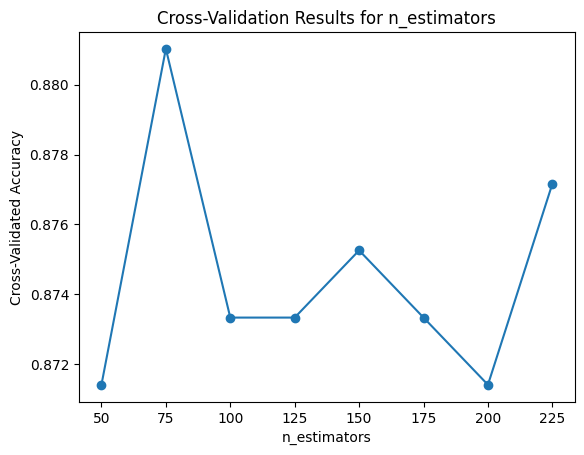

Best n_estimators: 75


In [ ]:
from sklearn.model_selection import cross_val_score

gb_classifier = GradientBoostingClassifier()
n_estimators_values = [50, 75, 100, 125, 150, 175, 200, 225]
cv_scores = []

for n_estimators in n_estimators_values:
    gb_classifier.n_estimators = n_estimators
    scores = cross_val_score(gb_classifier, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

plt.plot(n_estimators_values, cv_scores, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validation Results for n_estimators')
plt.show()

gb_best_n_estimators = n_estimators_values[np.argmax(cv_scores)]

print(f"Best n_estimators: {gb_best_n_estimators}")


In [ ]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier

gbm_classifier = GradientBoostingClassifier(n_estimators=gb_best_n_estimators, learning_rate=0.1)
gbm_classifier.fit(X_train, y_train)
ada_pred = gbm_classifier.predict(X_test)
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88       189
         1.0       0.79      0.77      0.78       213
         2.0       0.82      0.94      0.88       265
         3.0       0.99      0.95      0.97       226
         4.0       1.00      1.00      1.00       240
         5.0       0.80      0.78      0.79       215
         6.0       0.83      0.72      0.77       218

    accuracy                           0.87      1566
   macro avg       0.87      0.87      0.87      1566
weighted avg       0.87      0.87      0.87      1566



In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
def build_model():
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(16,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(7, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model()
model.fit(X_train, y_train, epochs = 200, batch_size=32)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

Epoch 1/200
27/27 [==============================] - 1s 2ms/step - loss: 1.8971 - accuracy: 0.2326
Epoch 2/200
27/27 [==============================] - 0s 3ms/step - loss: 1.6457 - accuracy: 0.3801
Epoch 3/200
27/27 [==============================] - 0s 3ms/step - loss: 1.4423 - accuracy: 0.4952
Epoch 4/200
27/27 [==============================] - 0s 3ms/step - loss: 1.2639 - accuracy: 0.6151
Epoch 5/200
27/27 [==============================] - 0s 3ms/step - loss: 1.1155 - accuracy: 0.6655
Epoch 6/200
27/27 [==============================] - 0s 3ms/step - loss: 0.9916 - accuracy: 0.6871
Epoch 7/200
27/27 [==============================] - 0s 3ms/step - loss: 0.8888 - accuracy: 0.7170
Epoch 8/200
27/27 [==============================] - 0s 3ms/step - loss: 0.8026 - accuracy: 0.7458
Epoch 9/200
27/27 [==============================] - 0s 3ms/step - loss: 0.7292 - accuracy: 0.7566
Epoch 10/200
27/27 [==============================] - 0s 3ms/step - loss: 0.6615 - accuracy: 0.7878
Epoch 11/

In [ ]:
#Finding best epoch (the epoch where loss of val set starting increase)
class BestEpochCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        self.validation_data = validation_data
        self.best_epoch = None
        self.best_val_loss = float('inf')
        self.train_losses = []
        self.val_losses = []

    def on_epoch_end(self, epoch, logs=None):
        train_loss = logs['loss']
        val_loss = self.model.evaluate(*self.validation_data, verbose=0)[0]
        self.train_losses.append(train_loss)
        self.val_losses.append(val_loss)
        if val_loss < self.best_val_loss:
            self.best_epoch = epoch
            self.best_val_loss = val_loss
            #print(f"Epoch {epoch + 1}: Validation Loss Changed to {val_loss}")


n_epoch = 200
model = build_model()
best_epoch_callback = BestEpochCallback(validation_data=(X_val, y_val))
model.fit(X_train, y_train, epochs=n_epoch, batch_size=32, validation_data=(X_val, y_val), callbacks=[best_epoch_callback], verbose=0)

epochs = [x for x in range(1, n_epoch+1)]
best_epoch = best_epoch_callback.best_epoch
fig = go.Figure()
fig.add_trace(go.Scatter(x=epochs, y=best_epoch_callback.train_losses, mode='lines', name='Train Loss'))
fig.add_trace(go.Scatter(x=epochs, y=best_epoch_callback.val_losses, mode='lines', name='Validation Loss'))
fig.add_trace(go.Scatter(x=[best_epoch + 1], y=[best_epoch_callback.val_losses[best_epoch]], mode='markers', name='Best Epoch'))

fig.update_layout(title='Training and Validation Losses',
                  xaxis_title='Epoch',
                  yaxis_title='Loss',
                  legend=dict(x=0, y=1, traceorder='normal'))
fig.show()

In [ ]:
#Train and test again with new found best epoch
improved_hyperparam_model = build_model()
improved_hyperparam_model.fit(X_train, y_train, epochs=best_epoch+1, batch_size=32)

test_loss, test_acc = improved_hyperparam_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

Epoch 1/118
27/27 [==============================] - 1s 2ms/step - loss: 1.7767 - accuracy: 0.3369
Epoch 2/118
27/27 [==============================] - 0s 2ms/step - loss: 1.4748 - accuracy: 0.5240
Epoch 3/118
27/27 [==============================] - 0s 2ms/step - loss: 1.2600 - accuracy: 0.5983
Epoch 4/118
27/27 [==============================] - 0s 2ms/step - loss: 1.1015 - accuracy: 0.6367
Epoch 5/118
27/27 [==============================] - 0s 2ms/step - loss: 0.9769 - accuracy: 0.6811
Epoch 6/118
27/27 [==============================] - 0s 2ms/step - loss: 0.8784 - accuracy: 0.7146
Epoch 7/118
27/27 [==============================] - 0s 2ms/step - loss: 0.7988 - accuracy: 0.7278
Epoch 8/118
27/27 [==============================] - 0s 2ms/step - loss: 0.7330 - accuracy: 0.7542
Epoch 9/118
27/27 [==============================] - 0s 5ms/step - loss: 0.6744 - accuracy: 0.7698
Epoch 10/118
27/27 [==============================] - 0s 6ms/step - loss: 0.6289 - accuracy: 0.7866
Epoch 11/

In [ ]:
print(X_train[0])
print(X_train[1])
X_train_RNN = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_RNN = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
# print(X_train_RNN.shape)
# print(X_train_RNN[0])
# print(X_train_RNN[1])
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=50, activation='relu', input_shape=(1, X_train_RNN.shape[2])),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_RNN, y_train, epochs=10, batch_size=32, validation_split=0.1)

accuracy = model.evaluate(X_test_RNN, y_test)
print(f'Test Accuracy: {accuracy[1]}')

[ 0.99188724 -0.9839225   1.5934212  -0.9774437   0.46039422  0.36301342
  1.08216361 -1.14837673  0.31812802 -0.14675475  0.89416713 -0.21958364
  0.32013787 -0.65124098 -0.52283354 -1.86458787]
[-1.00817911  0.78378623 -0.9198776   0.68694988  0.46039422  0.36301342
  1.08216361  0.76754129  0.31812802 -0.14675475  1.06688433 -0.21958364
 -1.1869768  -0.17908567 -0.52283354  0.50676794]
Epoch 1/10
24/24 [==============================] - 2s 16ms/step - loss: -0.8073 - accuracy: 0.1240 - val_loss: -1.9329 - val_accuracy: 0.0952
Epoch 2/10
24/24 [==============================] - 0s 4ms/step - loss: -2.3711 - accuracy: 0.1320 - val_loss: -3.5951 - val_accuracy: 0.1071
Epoch 3/10
24/24 [==============================] - 0s 4ms/step - loss: -3.9505 - accuracy: 0.1320 - val_loss: -5.3253 - val_accuracy: 0.1071
Epoch 4/10
24/24 [==============================] - 0s 4ms/step - loss: -5.6541 - accuracy: 0.1320 - val_loss: -7.2225 - val_accuracy: 0.1071
Epoch 5/10
24/24 [=====================